# Лабораторная работа №2. Дискретные LTI системы.

Лаборатория цифровой обработки сигналов, ФРКТ МФТИ


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import time

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 | 8 | 7 | 8 | 7 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

## Задача 1.2. Эффективное вычисление свертки 




| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |    $7$ |    $8$ |    $9$ |    $10$ |  
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| $128$ | $32$ | $256$ | $64$ | $512$ | $1024$ | $230$ | $325$ | $501$ | $1000$ |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени. 



# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 | 14 | 13 |  9 | 12 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 | 50 | 40 | 24 | 50 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 | 63 | 57 | 35 | 63 |
| $N$ |100 |140 |130 |100 |140 | 115 |140 | 130 | 100 | 140 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |0.2 |0.3 |0.1 | 0.2 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 | 24 | 22 | 26 | 28 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(variant)` (приведенной ниже), где `variant` – номер варианта. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
def task_3_2(variant):
    nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15, 0.2, 0.15, 0.15, 0.1]
    amp1 = [1,  0, 0.2, 1, 1, 0.6, 0.3, 0.2, 1, 1]
    nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.35,  0.4, 0.4,  0.3,  0.35,  0.4]
    amp2 = [0.4, 1, 1, 0.4, 0.7,  1, 1, 1, 0.4, 0.7]
    def H_val(nu, n):
        return amp1[n] if abs(nu)<=nu_c1[n] else amp2[n] if abs(nu)<=nu_c2[n] else 0.0
    nu=np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant-1) for x in nu] ,'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1],amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" %variant)
    plt.tight_layout()
    plt.show()

Пример вывода задания для первого варианта.

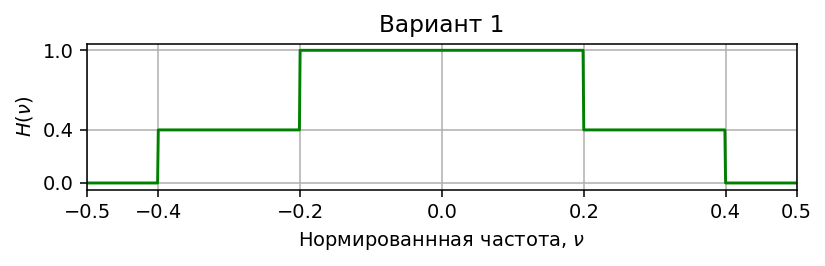

In [3]:
task_3_2(variant=1)